In [188]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim
import torch
%matplotlib inline
import matplotlib.pyplot as plt

In [278]:
trainset = torch.utils.data.DataLoader(datasets.MNIST('./data', train=True, transform= transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),batch_size=100, shuffle=True)
testset = torch.utils.data.DataLoader(datasets.MNIST('./data', train=False, transform= transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),batch_size=1000, shuffle=True)
print(len(trainset)*100," ", len(testset)*1000) ## size each batch is of size 100 & 1000 respectively hence total is 100* len(trainset) & 1000*len(testset)

60000   10000


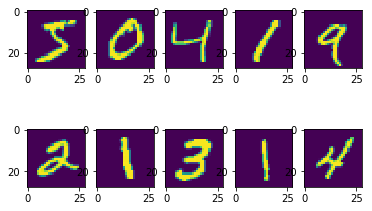

In [273]:
for i in range(10):
    plt.subplot(2,5,i+1)
    image, _ = trainset.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())

## Lets create model

In [302]:
input_size = 28*28
n_hidden    = 8
output_size =10 # classes
class FC1Layer(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC1Layer,self).__init__()
        self.input_size = input_size
        self.net = nn.Sequential(nn.Linear(input_size,n_hidden),
              nn.ReLU(),
              nn.Linear(n_hidden,output_size),              
              nn.LogSoftmax())
    
    def forward(self, x):
        x = x.view(-1, input_size)
        return self.net(x)
    

## Lets define Train & Test modules

In [303]:
def train(epoch, model, perm= torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(trainset):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainset.dataset),
                100 * batch_idx / len(trainset), loss.data[0]))
        

In [304]:
def test(model, perm= torch.arange(0,784).long()):
    model.eval()
    test_loss=0
    correct=0
    for data, target in testset:
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    test_loss /= len(testset.dataset)
    accuracy = 100. * correct / len(testset.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset.dataset),accuracy))     

## Lets train and test our model

In [305]:
model = FC1Layer(input_size, n_hidden, output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(0, 1):
    train(epoch, model)
    test(model)

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.274706
Train Epoch: 0 [10000/60000 (17%)]	Loss: 1.502684
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.889876
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.842333
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.464639
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.601880

Test set: Average loss: 0.4794, Accuracy: 8648/10000 (86%)



## Lets show how confident is our model on test data

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


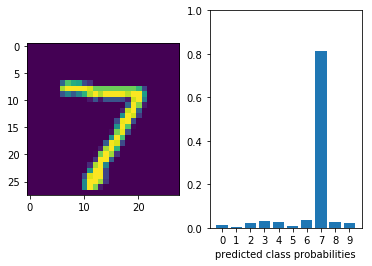

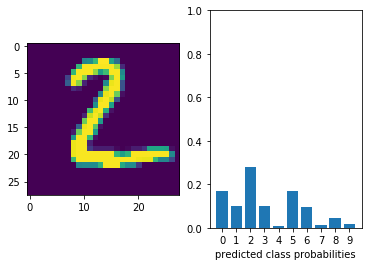

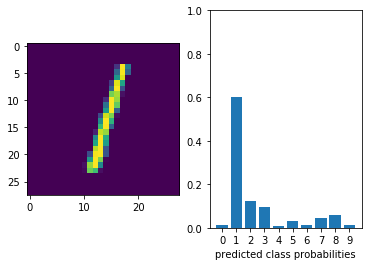

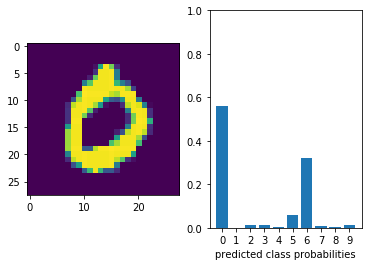

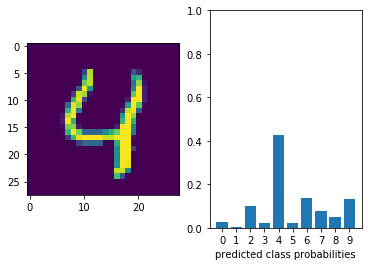

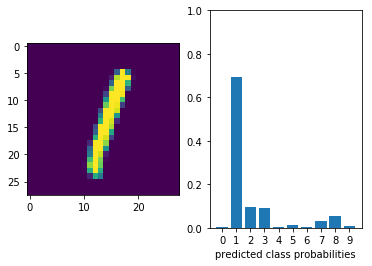

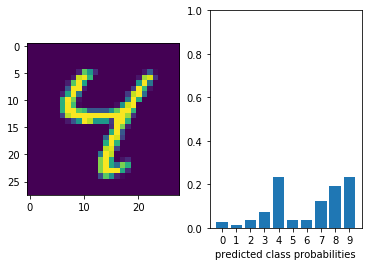

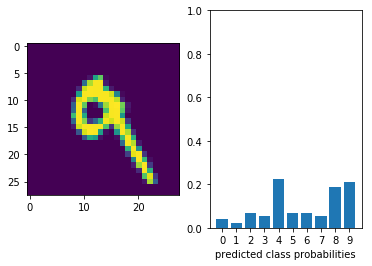

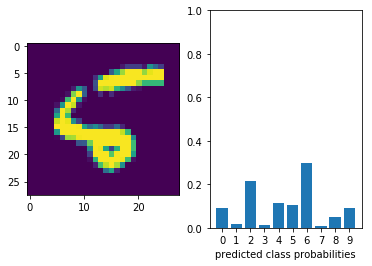

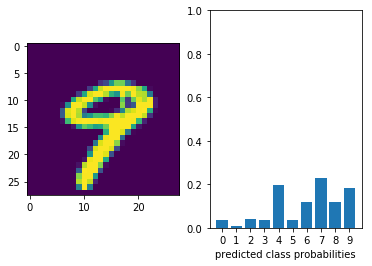

In [251]:
# show an image and the predicted probabilities                                                                                                               
def display(i):
    plt.figure(i + 1)
    image, _ = testset.dataset.__getitem__(i)
    logprob = model(Variable(image))
    prob = torch.exp(logprob).squeeze().data
    plt.subplot(121)
    plt.imshow(image.squeeze().numpy())
    plt.subplot(122)
    plt.bar(range(10), prob.numpy())
    plt.xlabel('predicted class probabilities')
    plt.xticks(range(10))
    plt.ylim([0, 1])

for i in range(10):
    display(i)